<a href="https://colab.research.google.com/github/inefable12/Exploracion_insilico_2024/blob/main/Smarts_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SMARTS

In many commonly used applications, such as word processing, we need to search for a particular text string. In cheminformatics, we encounter similar situations where we want to determine whether atoms in a molecule match a particular pattern. There are a number of use cases where this may arise:

• Searching a database of molecules to identify molecules containing a particular substructure

• Aligning a set of molecules on a common substructure to improve visualization

• Highlighting a substructure in a plot


• Constraining a substructure during a calculation

In [1]:
%%capture
!pip install rdkit

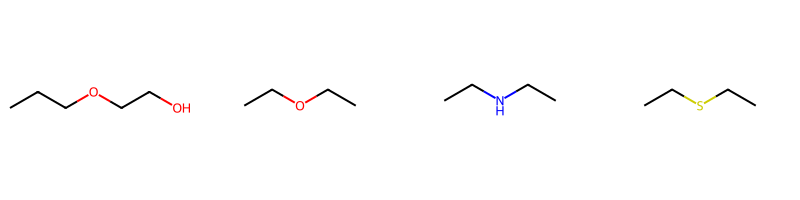

In [37]:
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
smiles_list = ["CCCOCCO","CCOCC","CCNCC","CCSCC"]
mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]
MolsToGridImage(mol_list, molsPerRow=4)

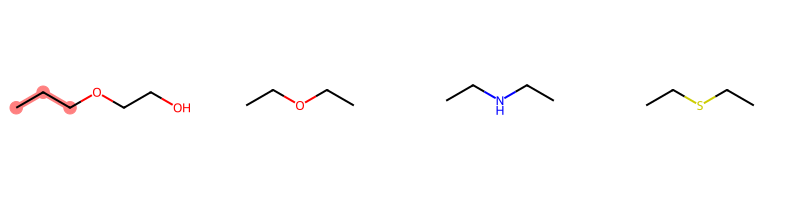

In [34]:
query = Chem.MolFromSmarts("CCC")
match_list = [mol.GetSubstructMatch(query) for mol in mol_list]
MolsToGridImage(mols=mol_list, molsPerRow=4,highlightAtomLists=match_list)

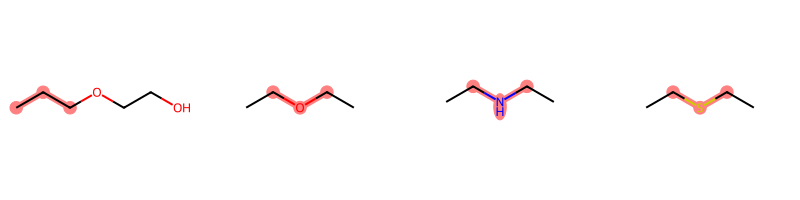

In [35]:
query = Chem.MolFromSmarts("C*C")
match_list = [mol.GetSubstructMatch(query) for mol in mol_list]
MolsToGridImage(mols=mol_list, molsPerRow=4,highlightAtomLists=match_list)

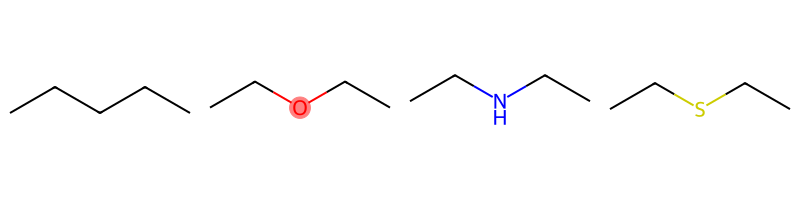

In [30]:
query = Chem.MolFromSmarts("O")
match_list = [mol.GetSubstructMatch(query) for mol in mol_list]
MolsToGridImage(mols=mol_list, molsPerRow=4,highlightAtomLists=match_list)

# PeruNPDB

In [13]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/inefable12/herramientas_basicas/main/perunpdb1.csv") #, index_col=0)
df

,number,smiles
0,1,CC=C1C2C3(C=CC4C3C(O2)OC=C4C(=O)OC)OC1=O
1,2,CC=C1C2C3(C=CC4C3C(O2)OC=C4C(=O)OC)OC1=O
2,3,CC(=O)OCC1=C\2C(CC(C)(O)C3(O)CCC(O3)\C=C2OC1=O...
3,4,CCOCC1=C\2C(CC(C)(O)C3(O)CCC(O3)\C=C2OC1=O)OC(...
4,5,CC1CCC2(CCC3(C(=CCC4C3(CCC5C4(CCC(C5(C)C)O)C)C...
...,...,...
275,276,C1=CC(=CC=C1C2=CC(=O)C3=C(O2)C=C(C=C3OC4C(C(C(...
276,277,C1=CC(=C(C=C1C2=CC(=O)C3=C(O2)C=C(C=C3OC4C(C(C...
277,278,C1=CN(C(=O)NC1=O)C2C(C(C(O2)CO)O)O
278,279,C1=NC2=C(C(=O)N1)N=CN2C3C(C(C(O3)CO)O)O


In [33]:
df['smiles'][1]

'CC=C1C2C3(C=CC4C3C(O2)OC=C4C(=O)OC)OC1=O'

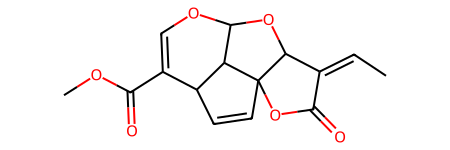

In [34]:
moleculaX = Chem.MolFromSmiles(df['smiles'][1])
moleculaX

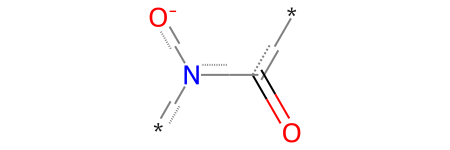

In [35]:
hydroxamate = Chem.MolFromSmarts('*C(=O)N([O-])*')
hydroxamate

[23:41:08] Explicit valence for atom # 2 C, 5, is greater than permitted
/usr/local/lib/python3.10/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


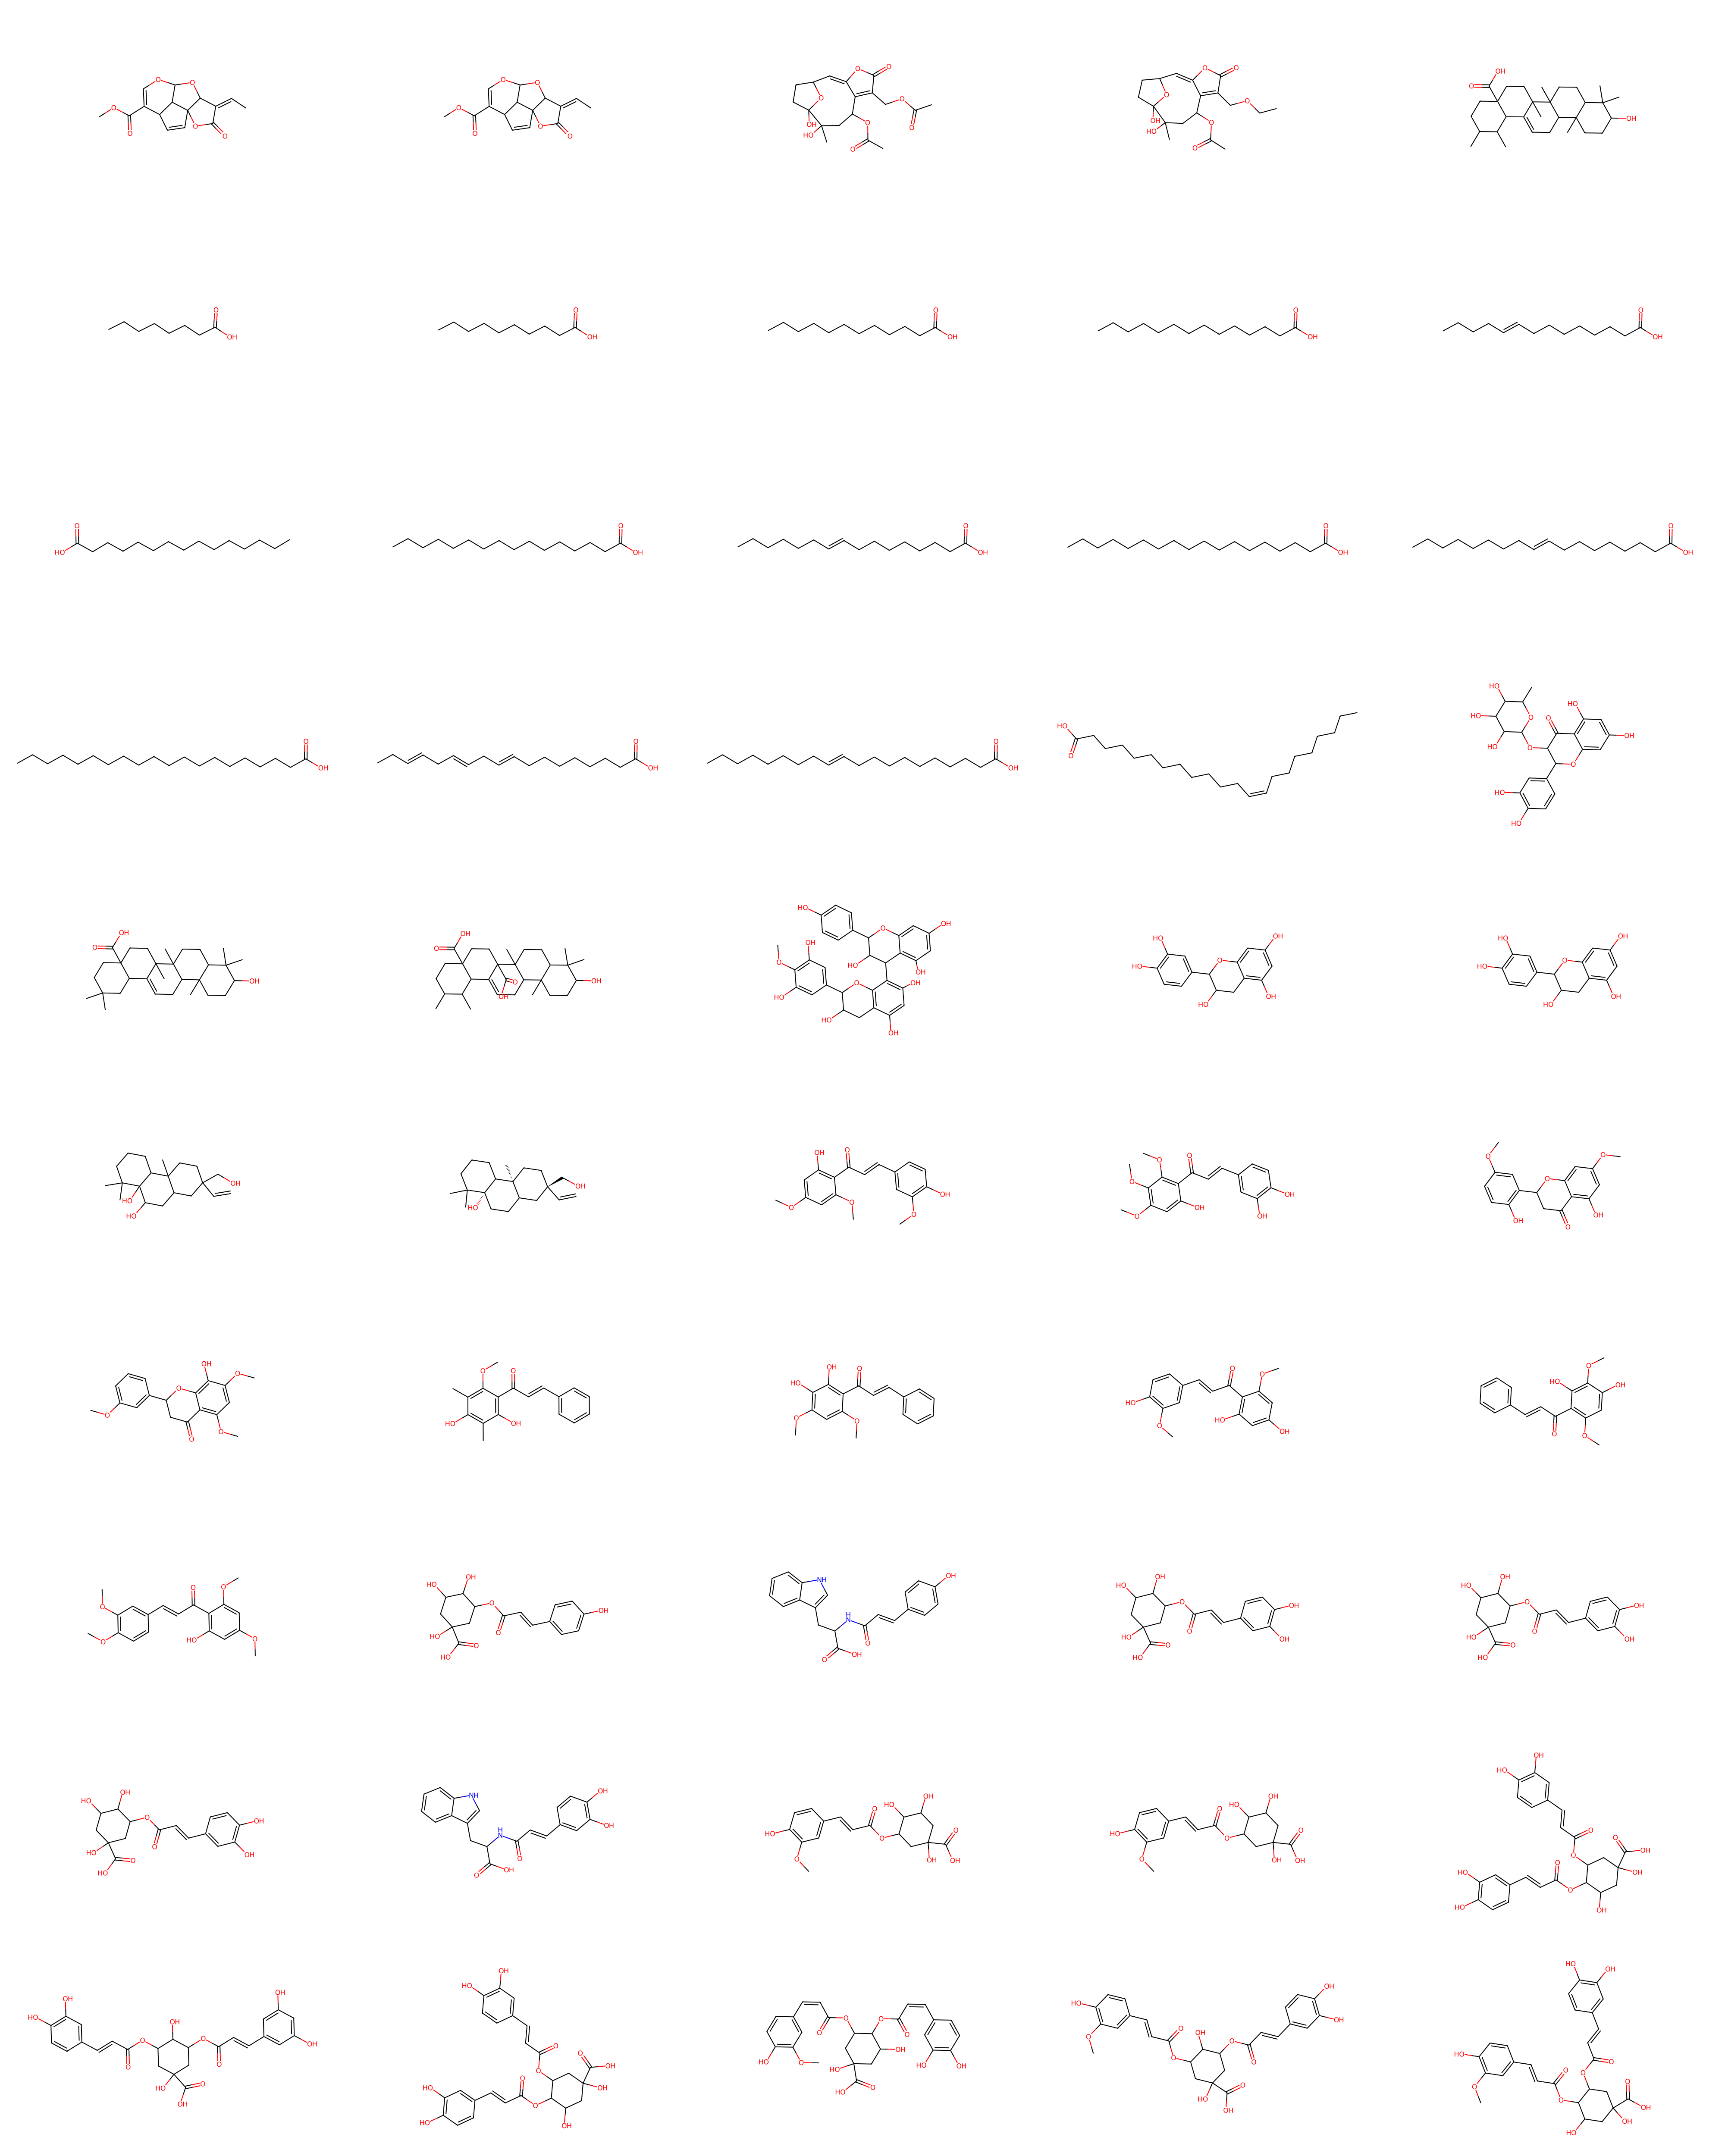

In [17]:
mol_list = [Chem.MolFromSmiles(x) for x in df['smiles']]
MolsToGridImage(mol_list, molsPerRow=5, subImgSize=(800,500))

In [39]:
catecol = Chem.MolFromSmarts('O**O')
mol_list[0].GetSubstructMatch(catecol)

(3, 4, 5, 6)